In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
hr=pd.read_csv("humanresources.csv")

In [2]:
hr.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [4]:
for c in hr.columns:
  if hr[c].dtype == object and (c not in ('Employee_Name', 'DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date', 'ManagerName')):
    print(c, hr[c].unique())

Position ['Production Technician I' 'Sr. DBA' 'Production Technician II'
 'Software Engineer' 'IT Support' 'Data Analyst' 'Database Administrator'
 'Enterprise Architect' 'Sr. Accountant' 'Production Manager'
 'Accountant I' 'Area Sales Manager' 'Software Engineering Manager'
 'BI Director' 'Director of Operations' 'Sr. Network Engineer'
 'Sales Manager' 'BI Developer' 'IT Manager - Support' 'Network Engineer'
 'IT Director' 'Director of Sales' 'Administrative Assistant'
 'President & CEO' 'Senior BI Developer' 'Shared Services Manager'
 'IT Manager - Infra' 'Principal Data Architect' 'Data Architect'
 'IT Manager - DB' 'Data Analyst ' 'CIO']
State ['MA' 'TX' 'CT' 'VA' 'VT' 'AL' 'WA' 'CA' 'OH' 'IN' 'TN' 'NH' 'RI' 'PA'
 'CO' 'NY' 'UT' 'GA' 'FL' 'NC' 'KY' 'ID' 'NV' 'MT' 'OR' 'ND' 'AZ' 'ME']
Sex ['M ' 'F']
MaritalDesc ['Single' 'Married' 'Divorced' 'Widowed' 'Separated']
CitizenDesc ['US Citizen' 'Eligible NonCitizen' 'Non-Citizen']
HispanicLatino ['No' 'Yes' 'no' 'yes']
RaceDesc ['White'

In [5]:
def preprocess_redundant_vals(hr):
  hr['HispanicLatino'].replace({'yes': 'Yes', 'no': 'No'}, inplace=True)
  hr['Position'].replace({'Data Analyst ': 'Data Analyst'}, inplace=True)
  return hr

In [6]:
print(hr['Position'].unique())
print(hr['HispanicLatino'].unique())

['Production Technician I' 'Sr. DBA' 'Production Technician II'
 'Software Engineer' 'IT Support' 'Data Analyst' 'Database Administrator'
 'Enterprise Architect' 'Sr. Accountant' 'Production Manager'
 'Accountant I' 'Area Sales Manager' 'Software Engineering Manager'
 'BI Director' 'Director of Operations' 'Sr. Network Engineer'
 'Sales Manager' 'BI Developer' 'IT Manager - Support' 'Network Engineer'
 'IT Director' 'Director of Sales' 'Administrative Assistant'
 'President & CEO' 'Senior BI Developer' 'Shared Services Manager'
 'IT Manager - Infra' 'Principal Data Architect' 'Data Architect'
 'IT Manager - DB' 'Data Analyst ' 'CIO']
['No' 'Yes' 'no' 'yes']


In [7]:
def add_extra_feature(hr):
  hr['Age'] = hr['DOB'].map(lambda x: 120 - int(x.split('/')[-1]))
  return hr

In [8]:
def preprocess_date_cols(hr):
  hr['DOB'] = pd.to_datetime(hr['DOB'])
  hr['DateofHire'] = pd.to_datetime(hr['DateofHire'])
  hr['DateofTermination'] = pd.to_datetime(hr['DateofTermination'])
  hr['LastPerformanceReview_Date'] = pd.to_datetime(hr['LastPerformanceReview_Date'])
  return hr

In [9]:
def drop_features(hr):
  hr.drop(labels=['Employee_Name','ManagerID','EmpID','EmpStatusID','DeptID','PerfScoreID','FromDiversityJobFairID',
                  'PositionID','MaritalStatusID','MarriedID','GenderID','TermReason','DateofTermination',
                  'Zip','DOB','DateofHire','LastPerformanceReview_Date'],axis=1,inplace=True)
  return hr

In [10]:
from sklearn.pipeline import Pipeline

cat_ord_attrs = ['PerformanceScore']
cat_nom_attrs = ['Position', 'State', 'Sex','MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc','Department',
                 'ManagerName', 'RecruitmentSource']

In [11]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_pipeline = ColumnTransformer([
        ("cat_nom", OneHotEncoder(), cat_nom_attrs),
        ("cat_ord", OrdinalEncoder(), cat_ord_attrs),
    ])

In [12]:
def concat_all_columns(dataframe):
  dataframe['Salary'] = hr['Salary']
  dataframe['Termd'] = hr['Termd']
  dataframe['EngagementSurvey'] = hr['EngagementSurvey']
  dataframe['EmpSatisfaction'] = hr['EmpSatisfaction']
  dataframe['SpecialProjectsCount'] = hr['SpecialProjectsCount']
  dataframe['DaysLateLast30'] = hr['DaysLateLast30']
  dataframe['Absences'] = hr['Absences']
  dataframe['Age'] = hr['Age']
  dataframe['Age'] = hr['Age']
  return dataframe

In [13]:
def preprocess_hr(hr):
  hr = preprocess_redundant_vals(hr)
  hr = add_extra_feature(hr)
  hr = preprocess_date_cols(hr)
  hr = drop_features(hr)
  hr= cat_pipeline.fit_transform(hr)
  column_name = np.append(cat_pipeline.transformers_[0][1].get_feature_names(cat_nom_attrs),'PerformanceScore')
  hr =  pd.DataFrame(hr.toarray(), columns=column_name) 
  prepared_data = concat_all_columns(hr)
  return prepared_data

hr = pd.read_csv('humanresources.csv')
prepared_data = preprocess_hr(hr)
prepared_data.head()

,Position_Accountant I,Position_Administrative Assistant,Position_Area Sales Manager,Position_BI Developer,Position_BI Director,Position_CIO,Position_Data Analyst,Position_Data Architect,Position_Database Administrator,Position_Director of Operations,...,RecruitmentSource_Website,PerformanceScore,Salary,Termd,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,62506,0,4.60,5,0,0,1,37
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,104437,1,4.96,3,6,0,17,45
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,64955,1,3.02,3,0,0,3,32
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,64991,0,4.84,5,0,0,15,32
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,50825,1,5.00,4,0,0,2,31


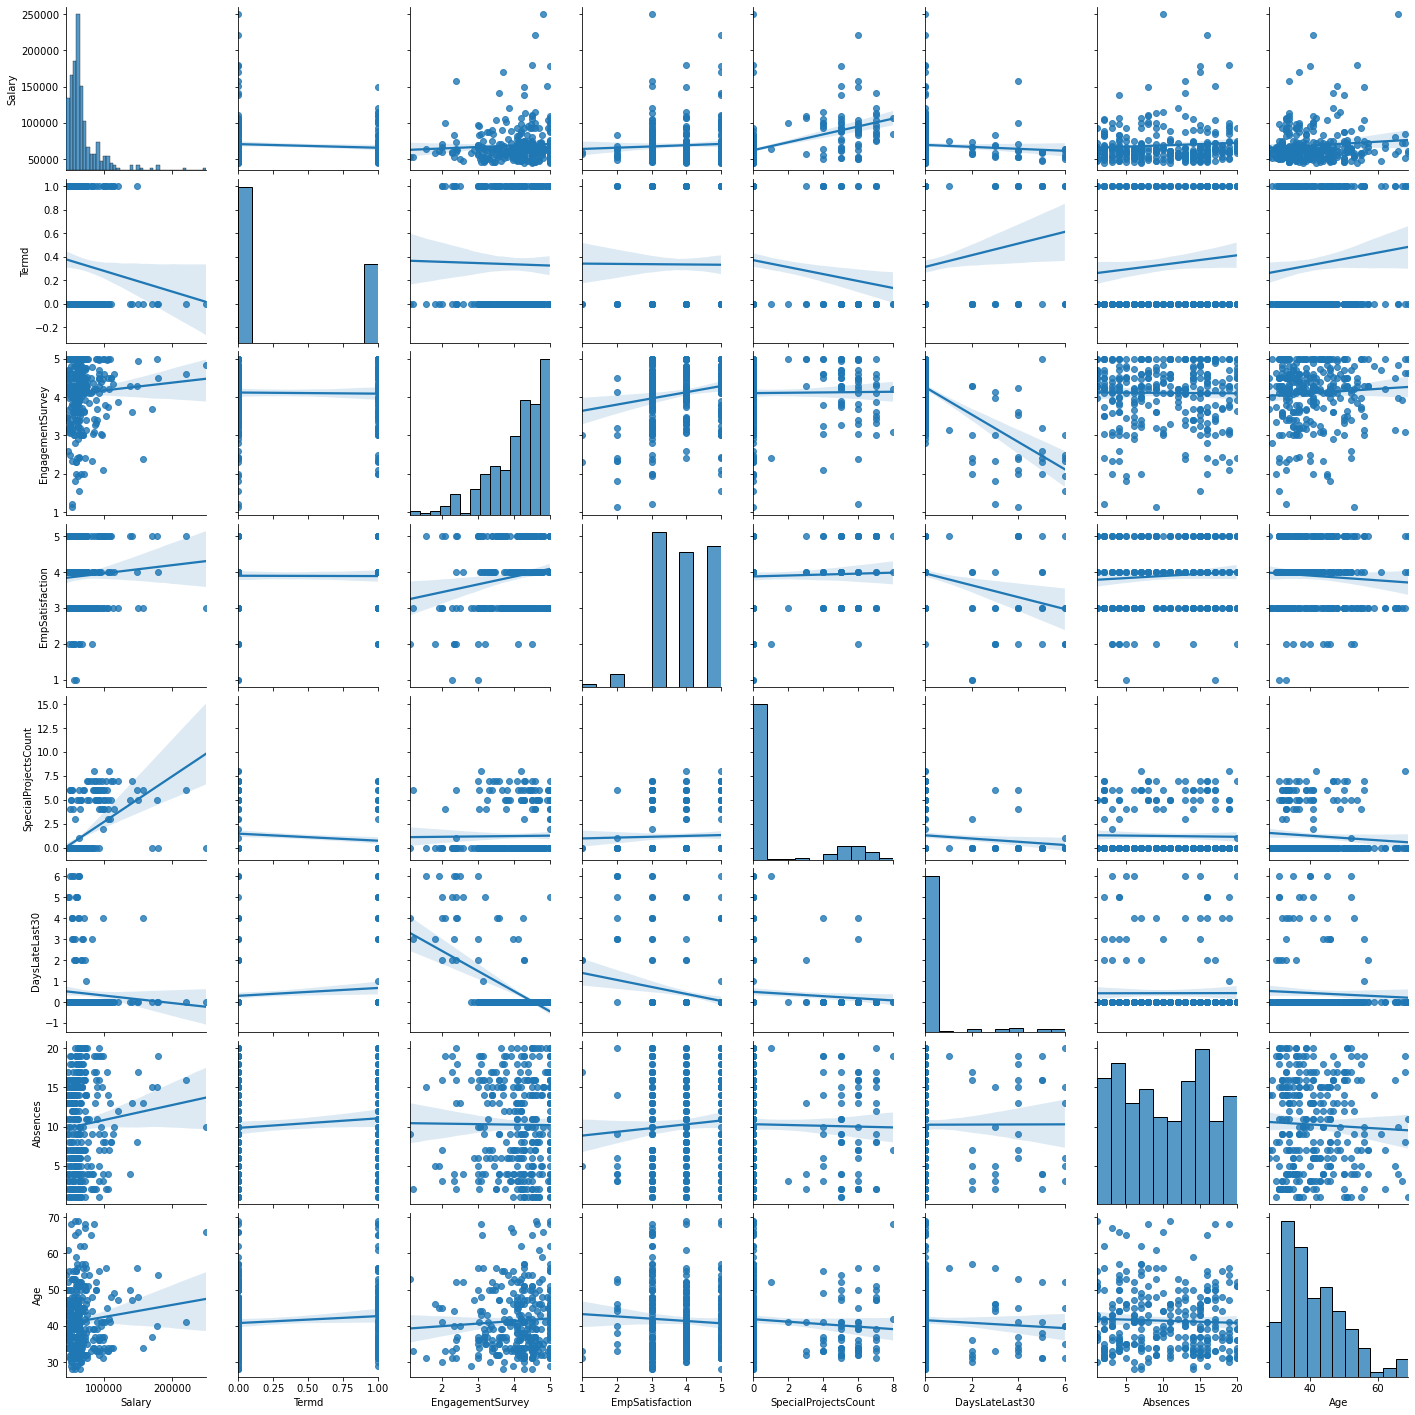

In [14]:
import seaborn as sns
sns.pairplot(hr, kind  ="reg");

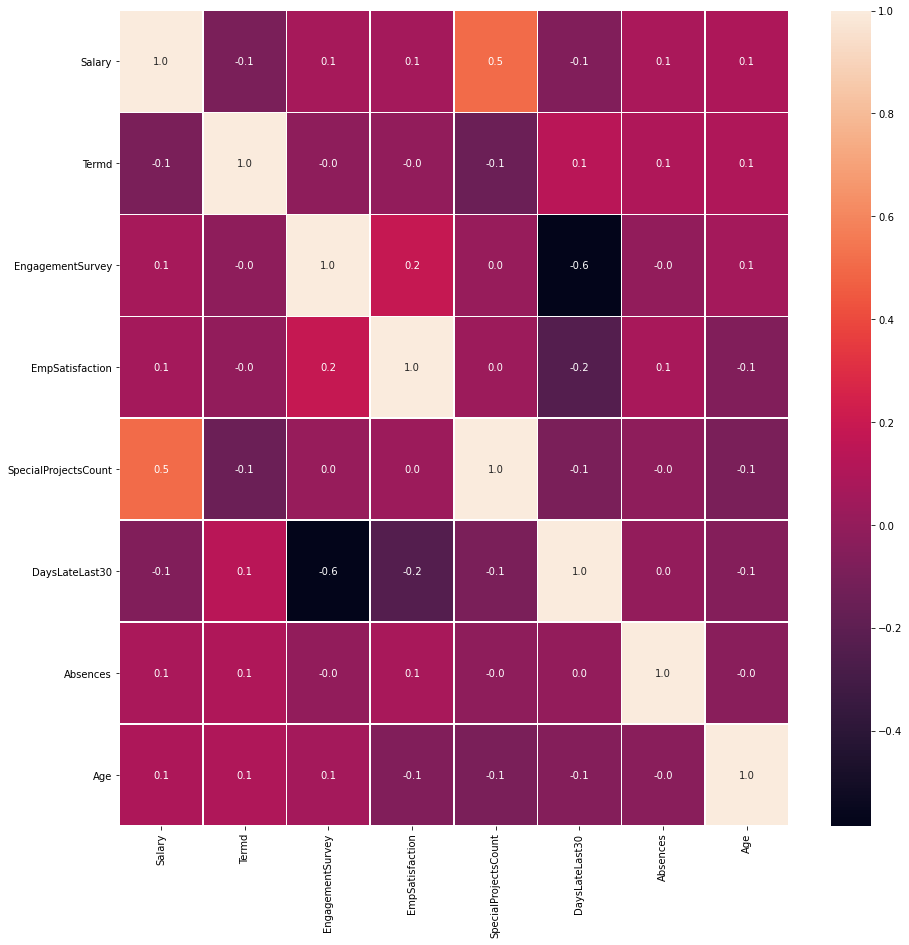

In [15]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(hr.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

C:\Users\su\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\su\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\su\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\su\anaconda3\lib\site-

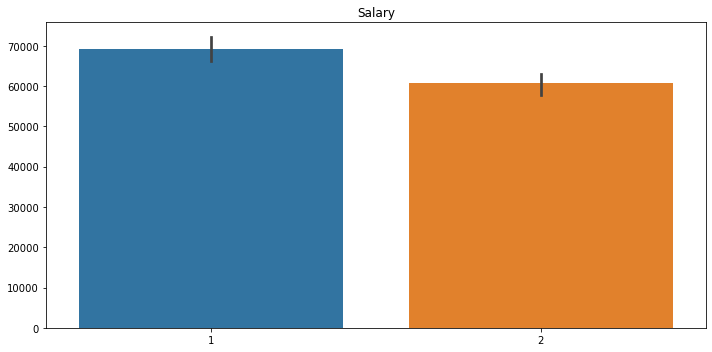

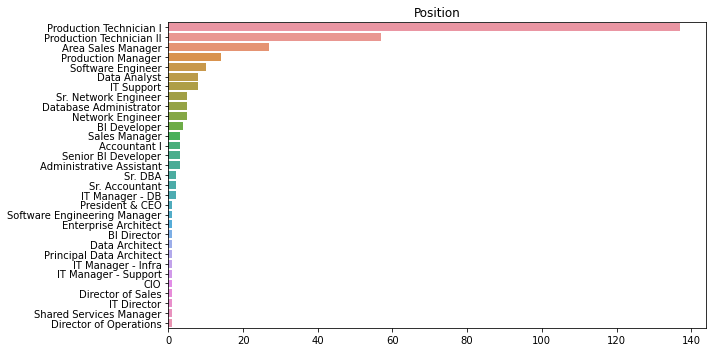

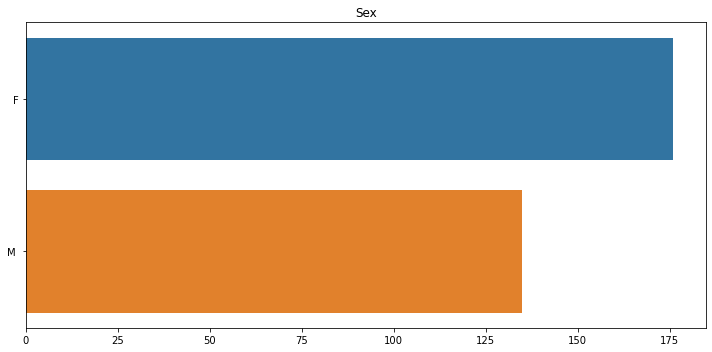

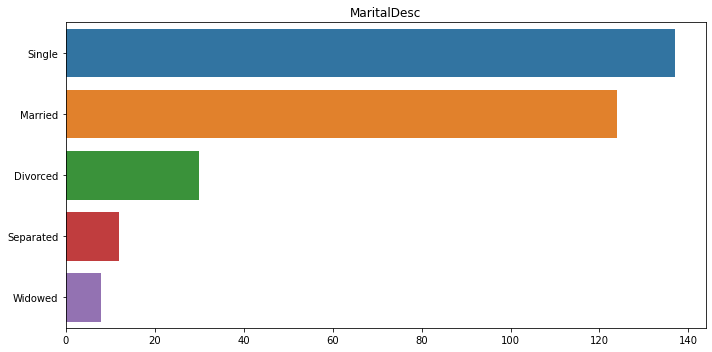

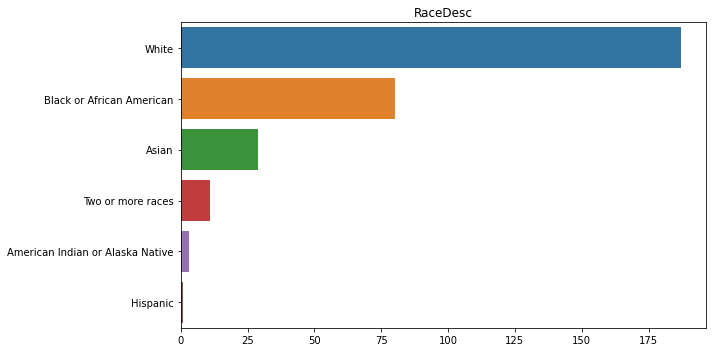

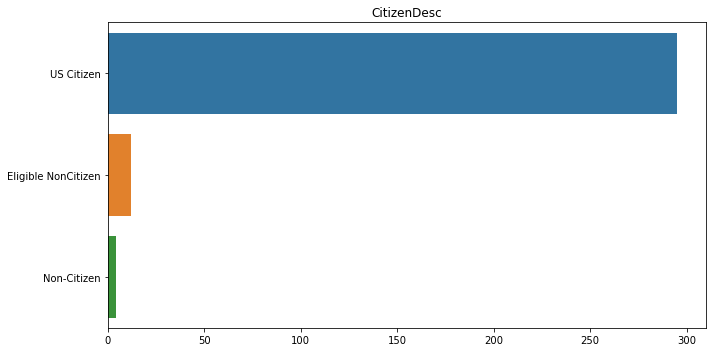

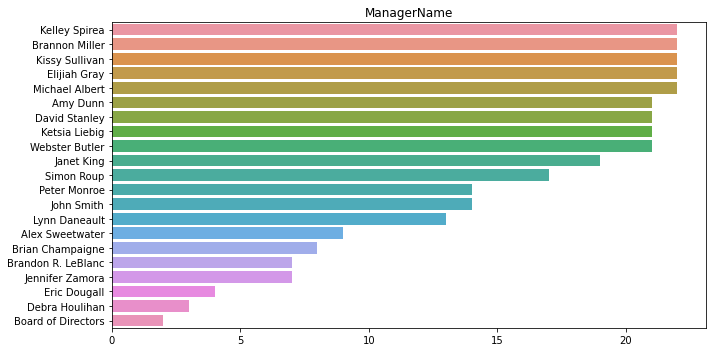

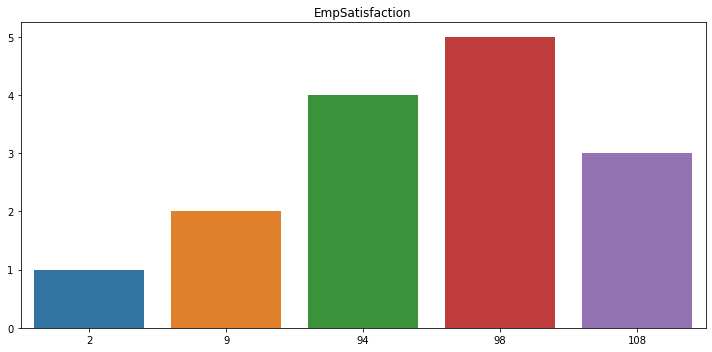

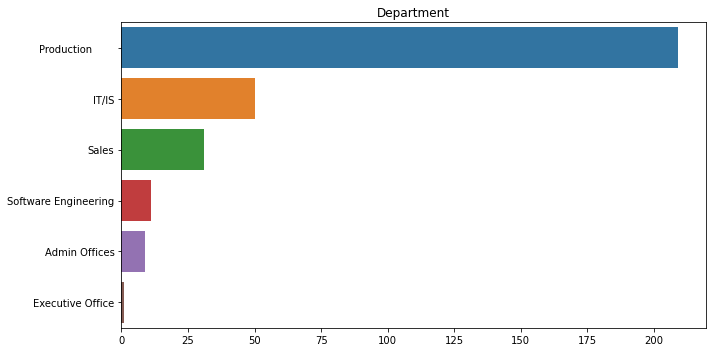

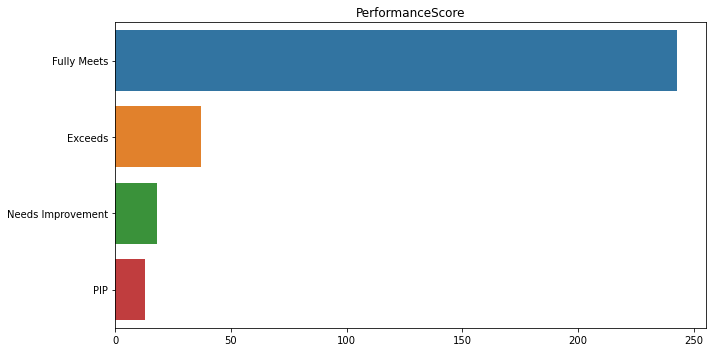

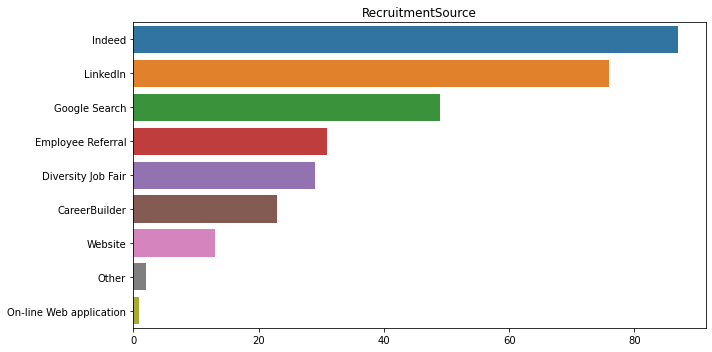

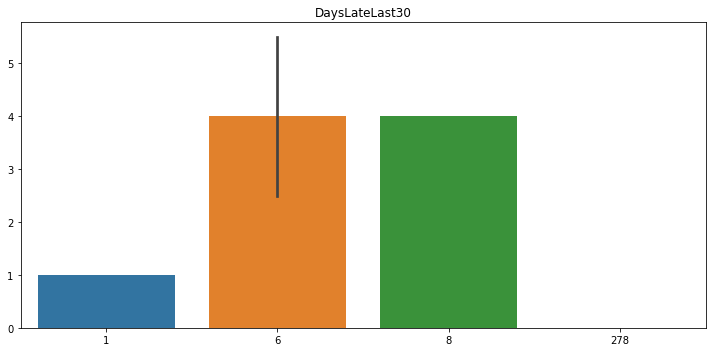

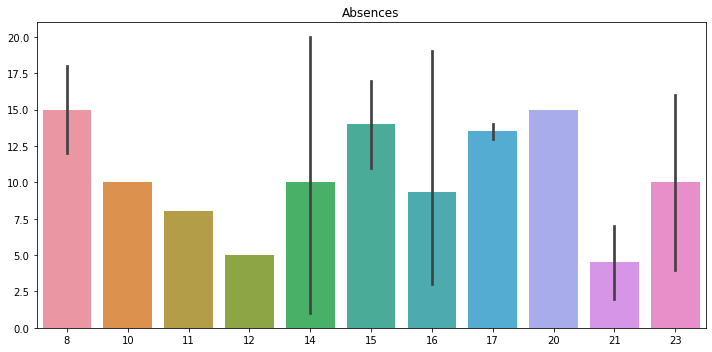

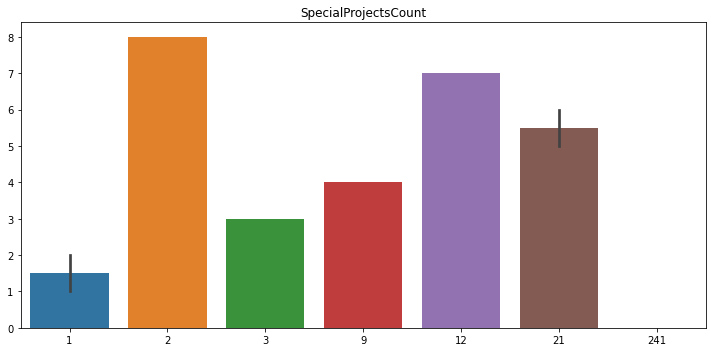

In [16]:
categorcial_variables = ['Salary', 'Position', 'Sex', 'MaritalDesc', 'RaceDesc',  'CitizenDesc',  'ManagerName', 'EmpSatisfaction',
                         'Department','PerformanceScore', 'RecruitmentSource', 'DaysLateLast30', 'Absences', 'SpecialProjectsCount']
for col in categorcial_variables:
    plt.figure(figsize=(10,5))
    sns.barplot(hr[col].value_counts().values, hr[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [17]:
X = prepared_data[[c for c in prepared_data.columns if c != 'Termd']]
y = prepared_data['Termd']

In [18]:
left_hr        = hr[hr['Termd'] == 1]
stayed_hr      = hr[hr['Termd'] == 0]

In [19]:
print("Total =", len(hr))

print("Number of employees who left the company =", len(left_hr))
print("Percentage of employees who left the company =", 1.*len(left_hr)/len(hr)*100.0, "%")
 
print("Number of employees who did not leave the company (stayed) =", len(stayed_hr))
print("Percentage of employees who did not leave the company (stayed) =", 1.*len(stayed_hr)/len(hr)*100.0, "%")

Total = 311
Number of employees who left the company = 104
Percentage of employees who left the company = 33.440514469453376 %
Number of employees who did not leave the company (stayed) = 207
Percentage of employees who did not leave the company (stayed) = 66.55948553054662 %


In [20]:
left_hr.describe()

,Salary,Termd,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age
count,104.000000,104.0,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,65690.076923,1.0,4.090481,3.884615,0.730769,0.663462,11.048077,42.682692
std,18679.799457,0.0,0.810150,0.862461,1.849853,1.646477,5.808230,9.714632
min,45115.000000,1.0,2.000000,2.000000,0.000000,0.000000,1.000000,29.000000
25%,53546.000000,1.0,3.585000,3.000000,0.000000,0.000000,6.000000,35.000000
50%,60547.000000,1.0,4.220000,4.000000,0.000000,0.000000,11.000000,41.000000
75%,70267.000000,1.0,4.715000,5.000000,0.000000,0.000000,16.000000,48.000000
max,148999.000000,1.0,5.000000,5.000000,7.000000,6.000000,20.000000,69.000000


In [21]:
stayed_hr.describe()

,Salary,Termd,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,70694.033816,0.0,4.119807,3.893720,1.463768,0.289855,9.830918,40.768116
std,27739.416425,0.0,0.781390,0.933887,2.532774,1.058045,5.846367,8.365692
min,45046.000000,0.0,1.120000,1.000000,0.000000,0.000000,1.000000,28.000000
25%,56593.000000,0.0,3.730000,3.000000,0.000000,0.000000,4.000000,34.000000
50%,63051.000000,0.0,4.290000,4.000000,0.000000,0.000000,10.000000,39.000000
75%,72816.000000,0.0,4.670000,5.000000,3.000000,0.000000,15.000000,46.000000
max,250000.000000,0.0,5.000000,5.000000,8.000000,6.000000,20.000000,69.000000


<AxesSubplot:xlabel='Age', ylabel='count'>

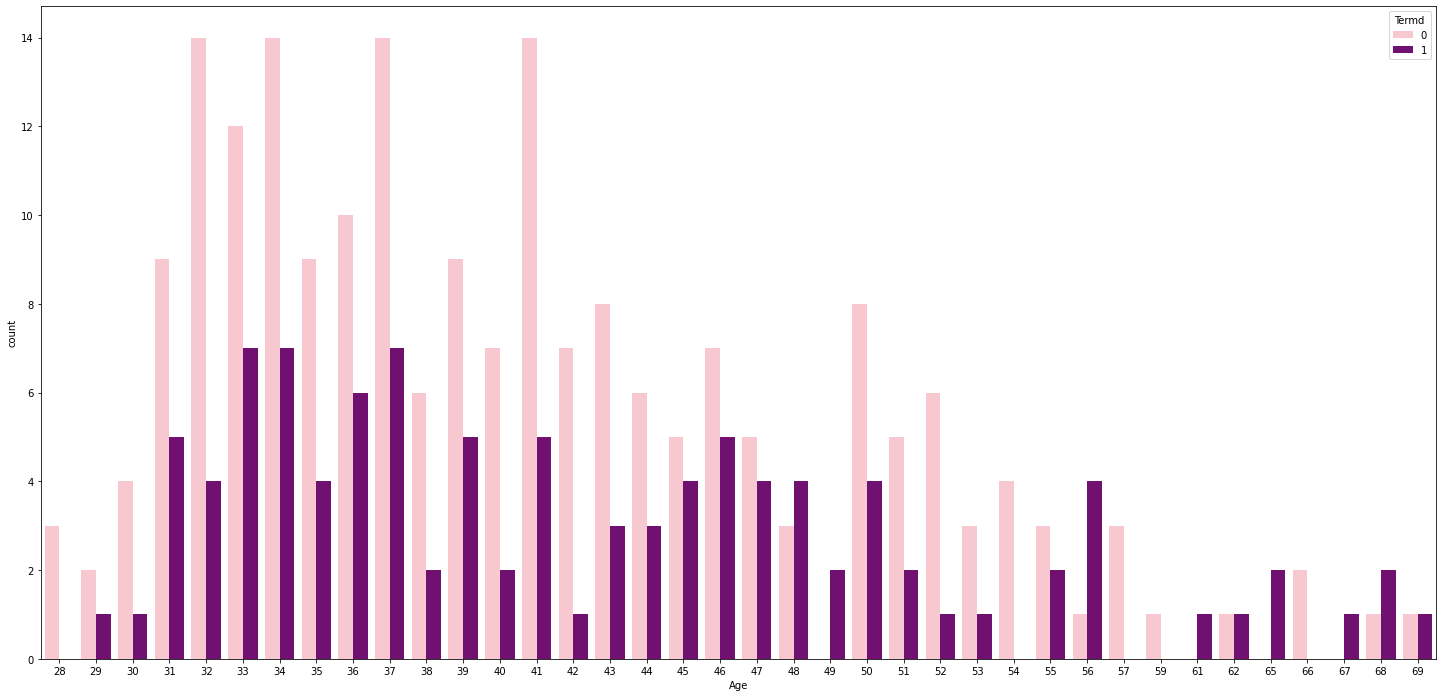

In [22]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Age', hue = 'Termd', data = hr, palette= ['pink','purple'])

<AxesSubplot:xlabel='ManagerName', ylabel='count'>

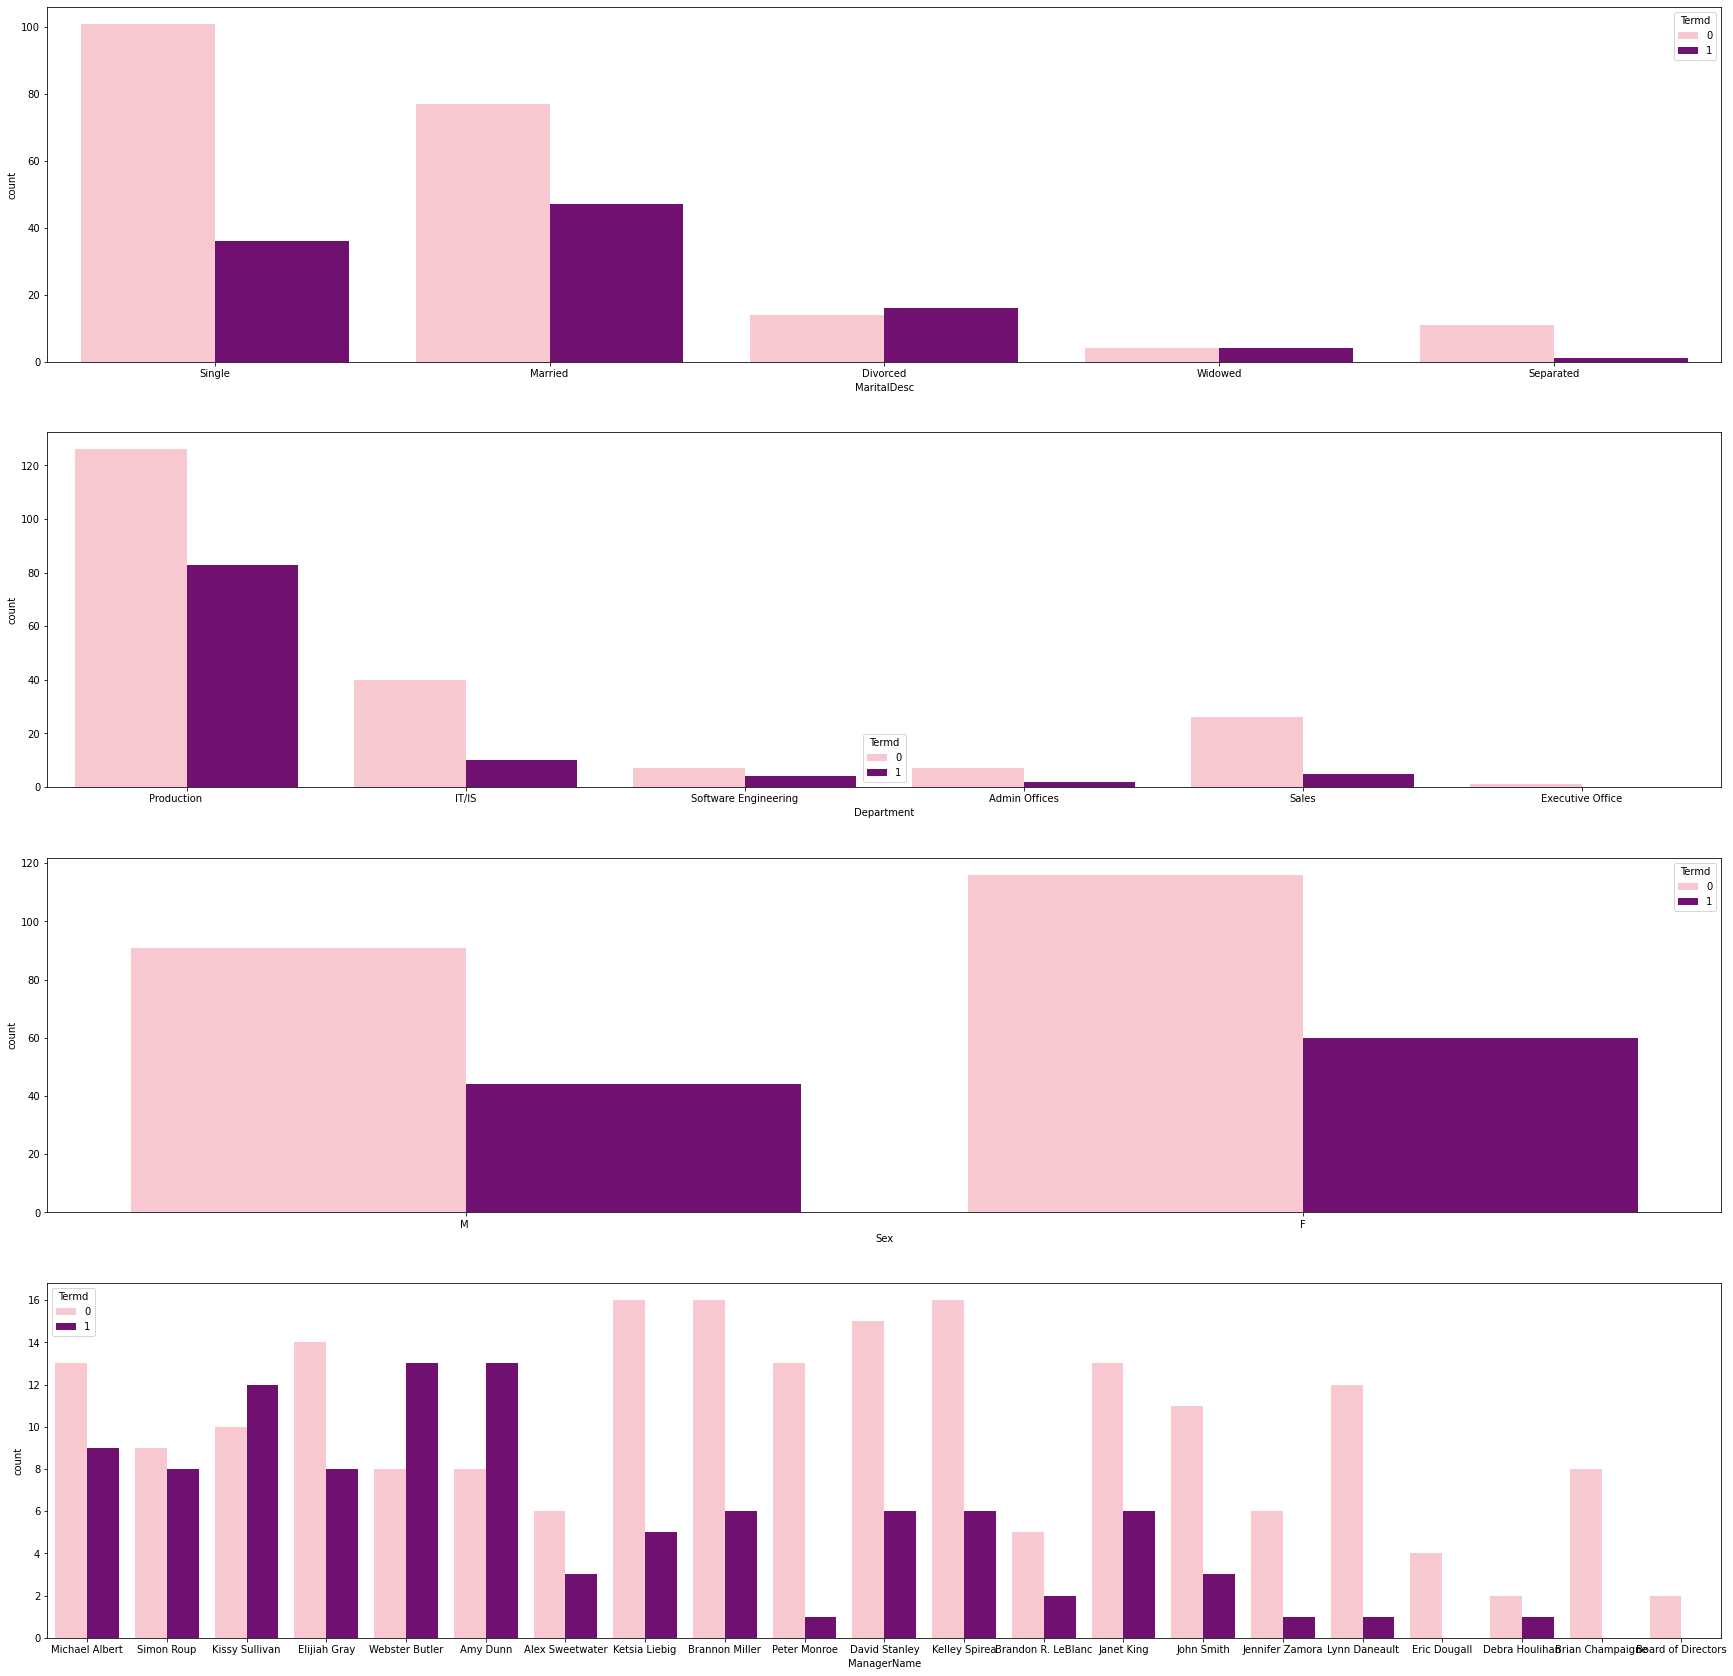

In [23]:
plt.figure(figsize=[30,30])
plt.subplot(411)
sns.countplot(x = 'MaritalDesc', hue = 'Termd', data = hr, palette= ['pink','purple'])
plt.subplot(412)
sns.countplot(x = 'Department', hue = 'Termd', data = hr,  palette= ['pink','purple'])
plt.subplot(413)
sns.countplot(x = 'Sex', hue = 'Termd', data = hr,  palette= ['pink','purple'])
plt.subplot(414)
sns.countplot(x = 'ManagerName', hue = 'Termd', data = hr,  palette= ['pink','purple'])

<AxesSubplot:xlabel='EmpSatisfaction', ylabel='count'>

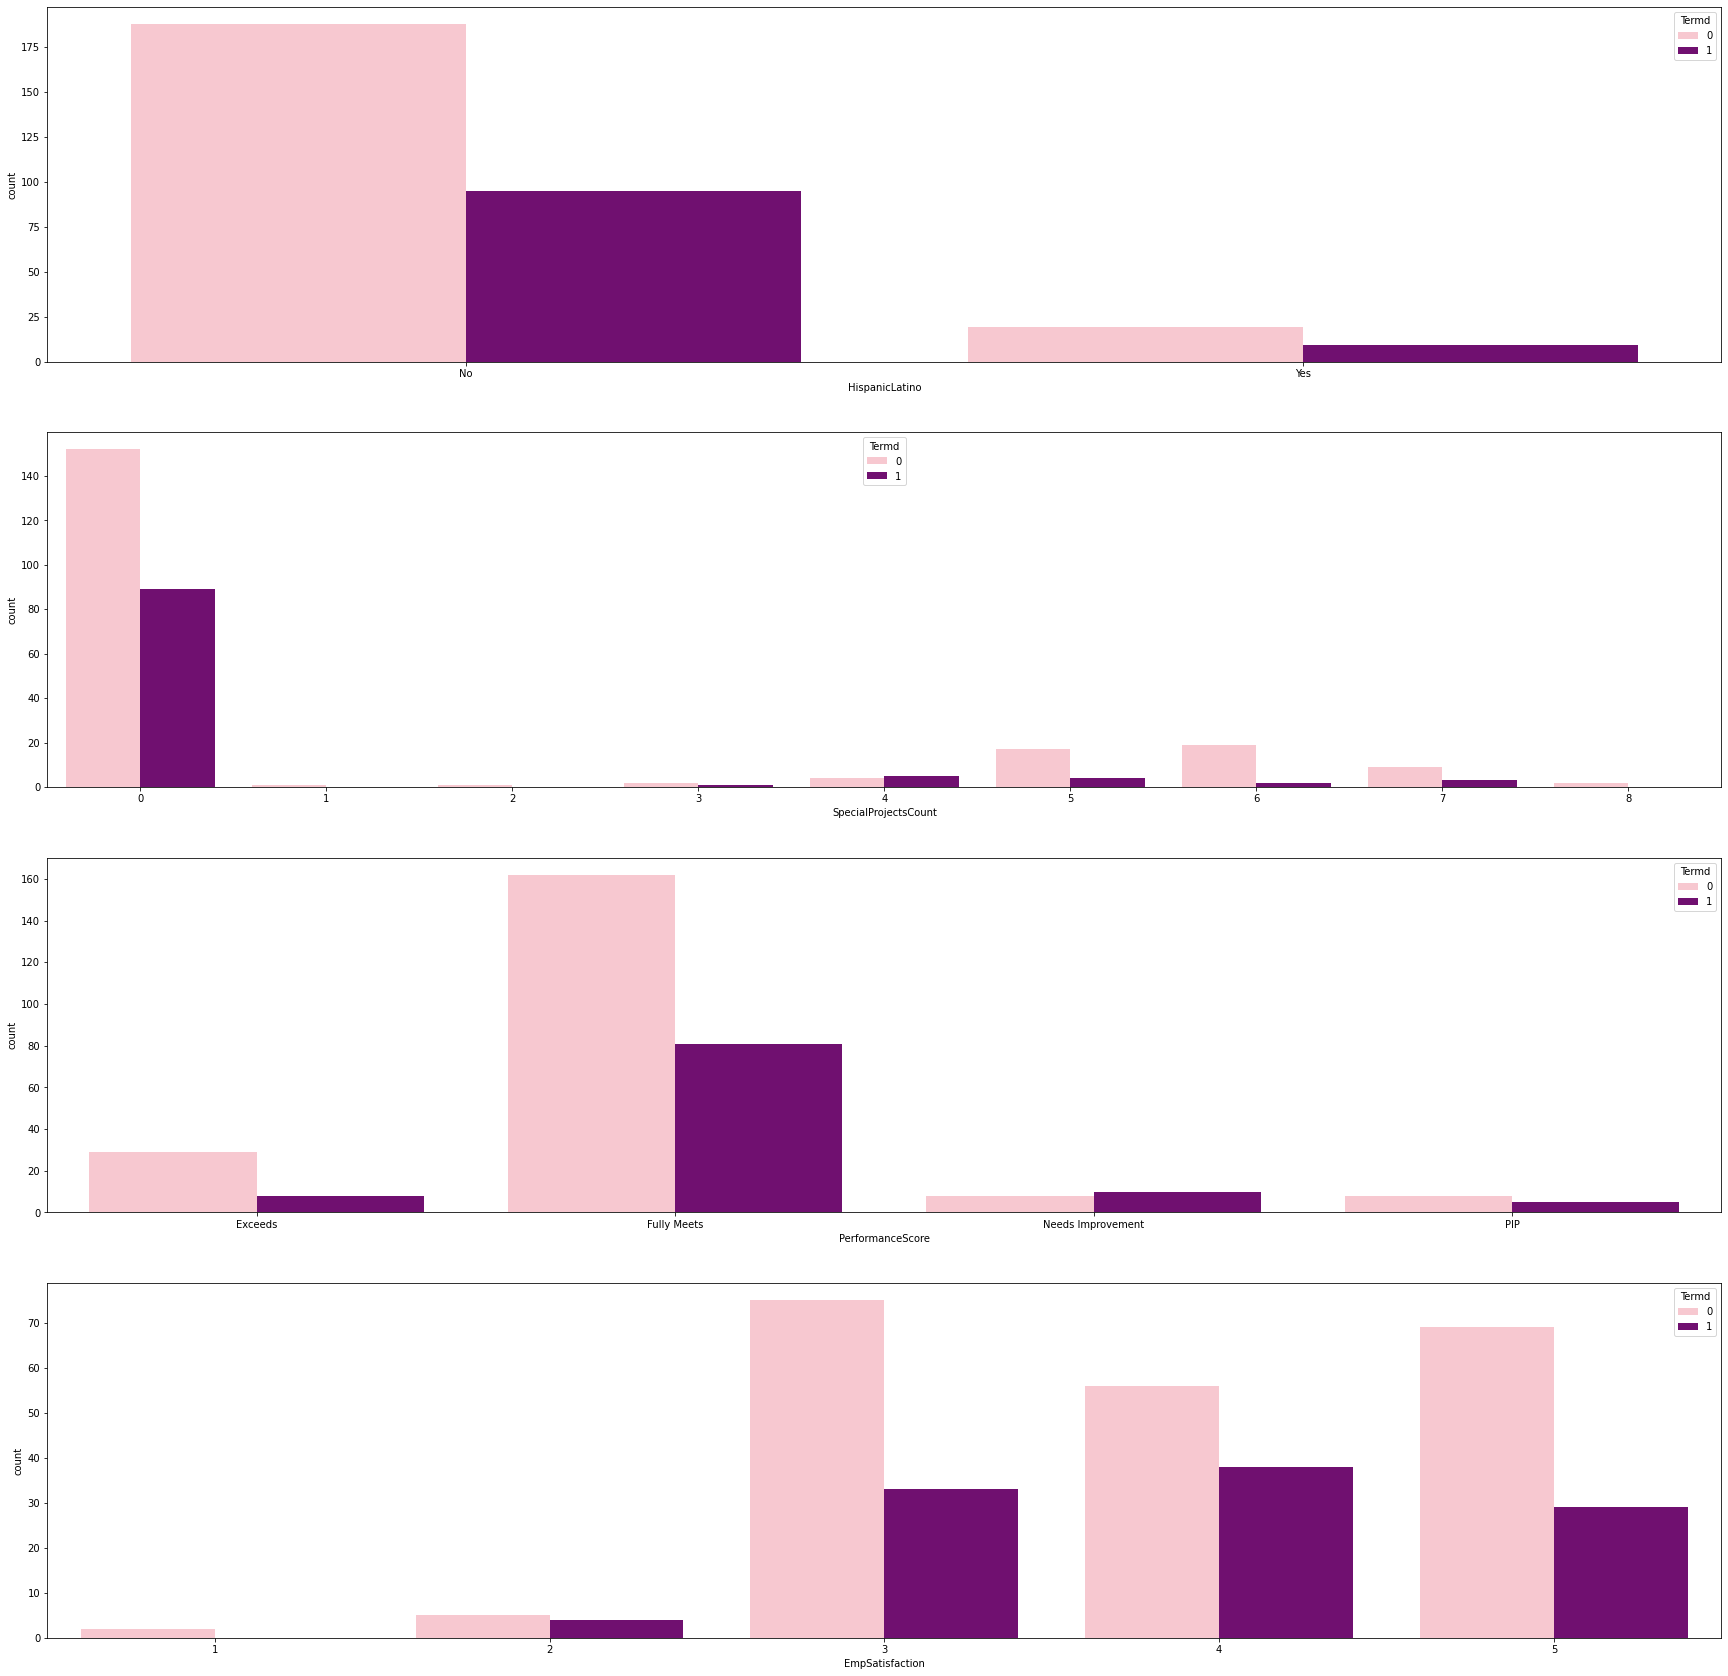

In [24]:
plt.figure(figsize=[30,30])
plt.subplot(411)
sns.countplot(x = 'HispanicLatino', hue = 'Termd', data = hr, palette= ['pink','purple'])
plt.subplot(412)
sns.countplot(x = 'SpecialProjectsCount', hue = 'Termd', data = hr,  palette= ['pink','purple'])
plt.subplot(413)
sns.countplot(x = 'PerformanceScore', hue = 'Termd', data = hr,  palette= ['pink','purple'])
plt.subplot(414)
sns.countplot(x = 'EmpSatisfaction', hue = 'Termd', data = hr,  palette= ['pink','purple'])

<AxesSubplot:xlabel='PerformanceScore', ylabel='count'>

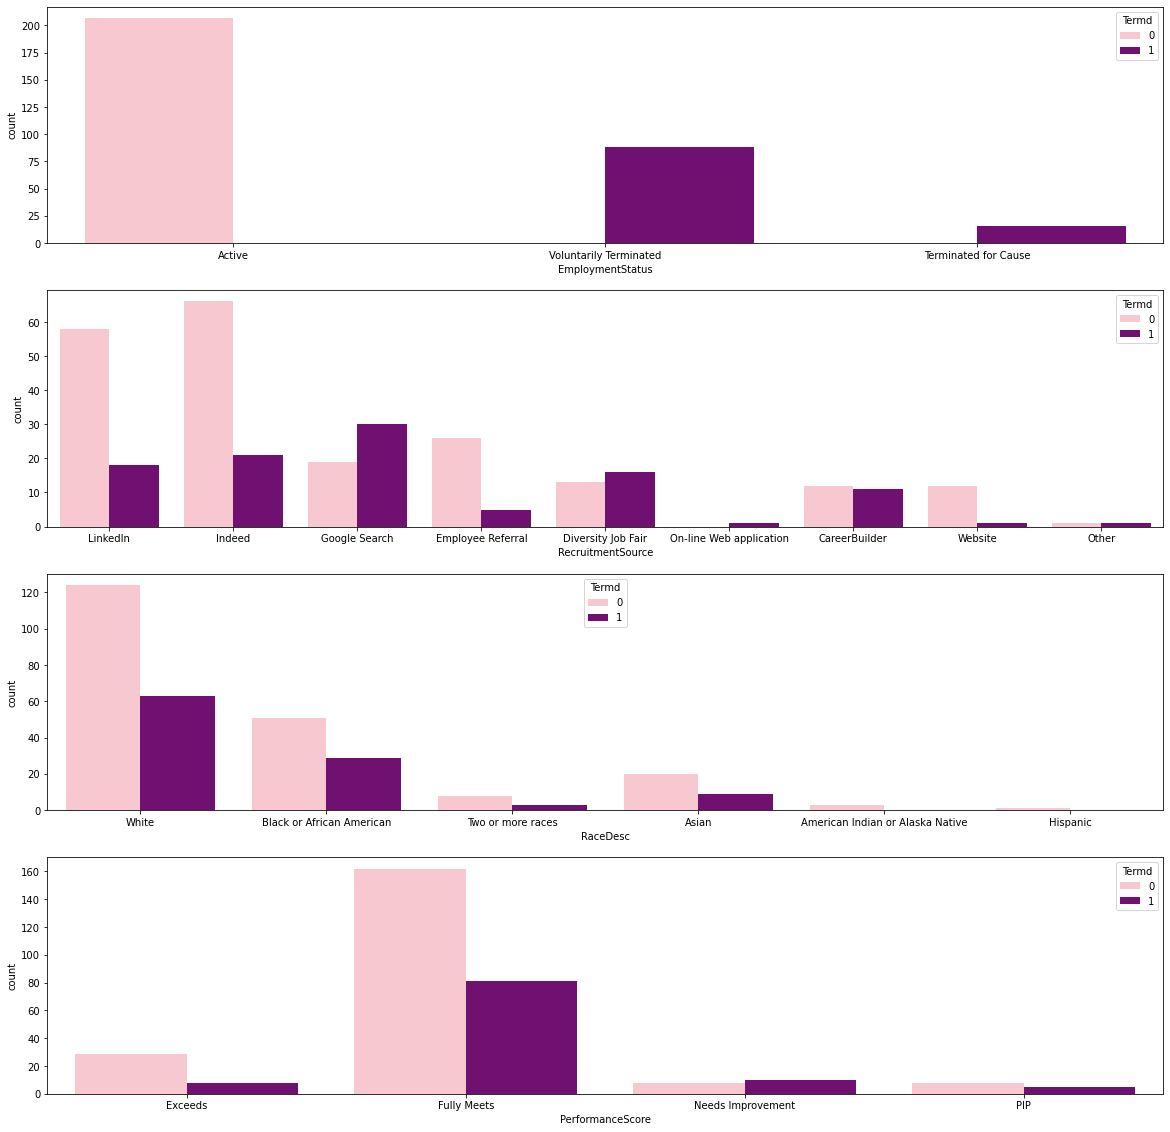

In [25]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'EmploymentStatus', hue = 'Termd', data = hr, palette= ['pink','purple'])
plt.subplot(412)
sns.countplot(x = 'RecruitmentSource', hue = 'Termd', data = hr,  palette= ['pink','purple'])
plt.subplot(413)
sns.countplot(x = 'RaceDesc', hue = 'Termd', data = hr,  palette= ['pink','purple'])
plt.subplot(414)
sns.countplot(x = 'PerformanceScore', hue = 'Termd', data = hr,  palette= ['pink','purple'])

Text(0.5, 0, 'Salary')

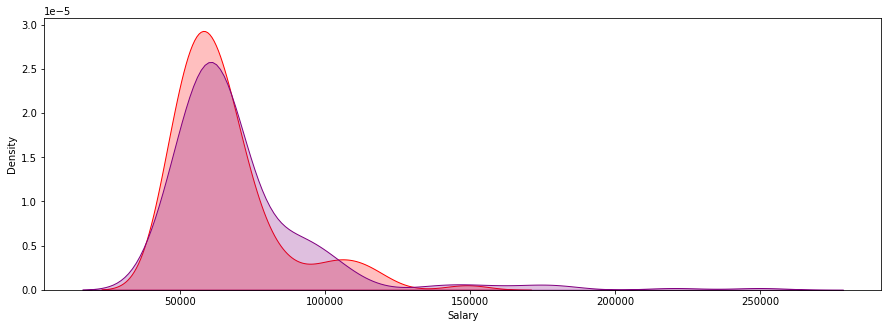

In [26]:
plt.figure(figsize=(15,5))

sns.kdeplot(left_hr['Salary'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_hr['Salary'], label = 'Employees who Stayed', shade = True, color = 'purple')

plt.xlabel('Salary')

Text(0.5, 0, 'EmpSatisfaction')

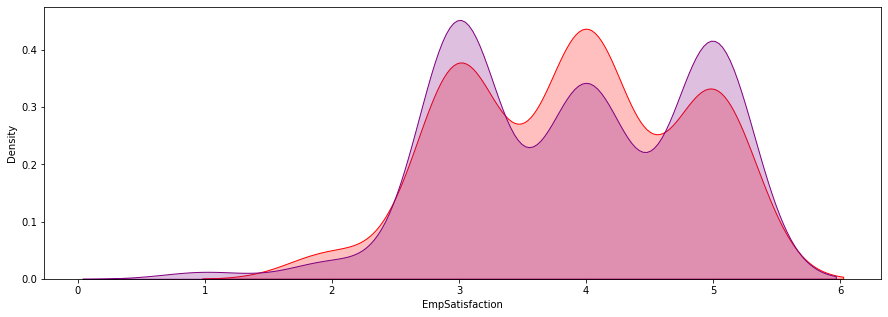

In [27]:
plt.figure(figsize=(15,5))

sns.kdeplot(left_hr['EmpSatisfaction'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_hr['EmpSatisfaction'], label = 'Employees who Stayed', shade = True, color = 'purple')

plt.xlabel('EmpSatisfaction')

Text(0.5, 0, 'EngagementSurvey')

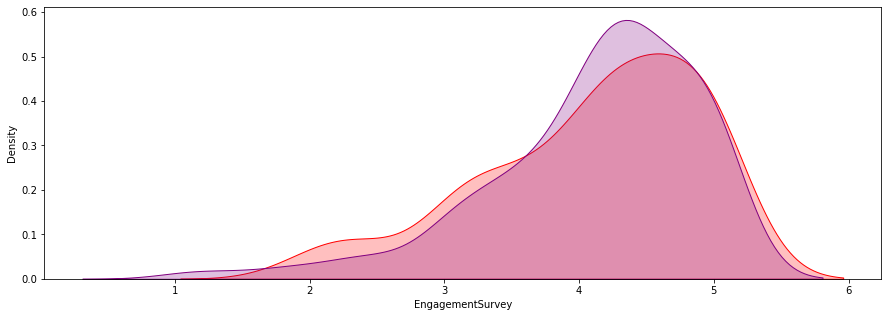

In [28]:
plt.figure(figsize=(15,5))

sns.kdeplot(left_hr['EngagementSurvey'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_hr['EngagementSurvey'], label = 'Employees who Stayed', shade = True, color = 'purple')

plt.xlabel('EngagementSurvey')

<AxesSubplot:xlabel='Salary', ylabel='Sex'>

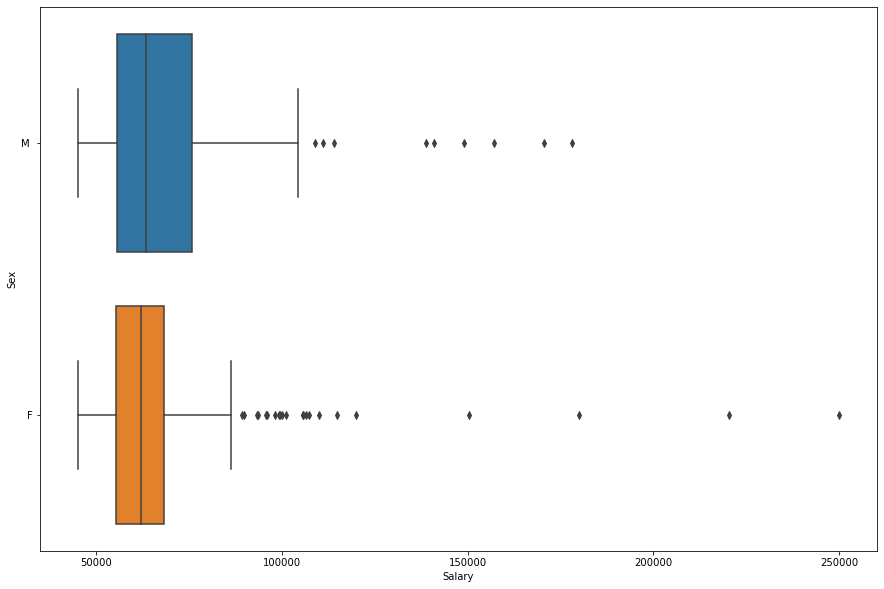

In [29]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Salary', y = 'Sex', data = hr)

<AxesSubplot:xlabel='Salary', ylabel='Position'>

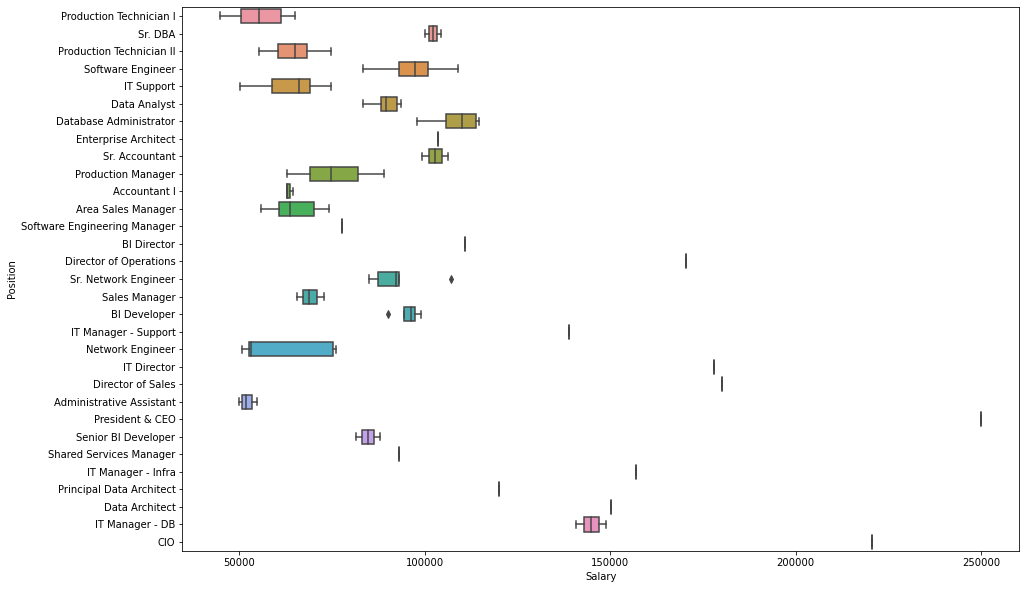

In [30]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Salary', y = 'Position', data = hr)

<AxesSubplot:xlabel='Salary', ylabel='Department'>

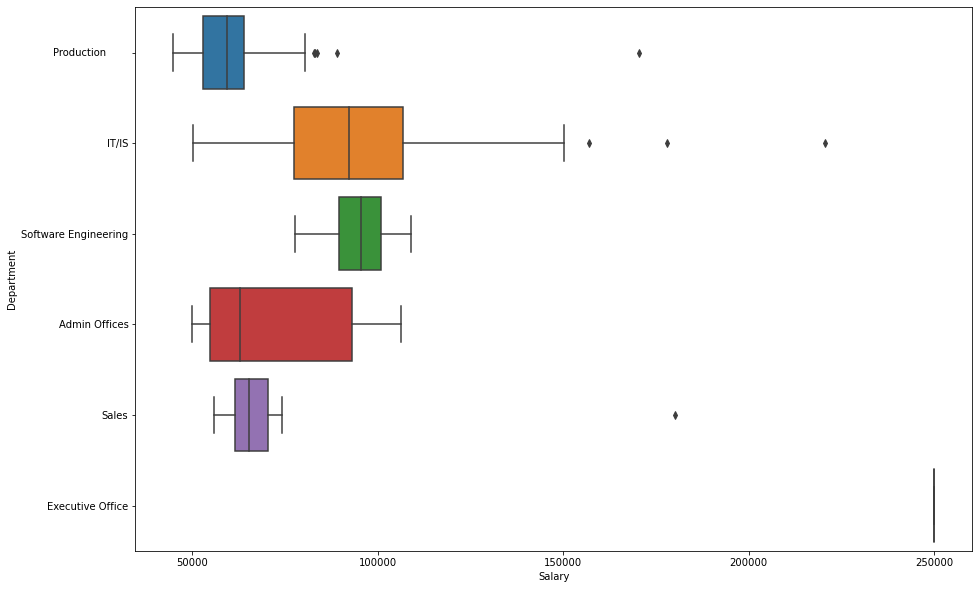

In [31]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Salary', y = 'Department', data = hr)

In [32]:
target = hr['Termd'].copy()

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hr, 
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)
print('Number transactions X_train dataset:', X_train.shape)
print('Number transactions X_test dataset:', X_test.shape)
print('Number transactions y_train dataset:', y_train.shape)
print('Number transactions y_test dataset:', y_test.shape)

Number transactions X_train dataset: (233, 20)
Number transactions X_test dataset: (78, 20)
Number transactions y_train dataset: (233,)
Number transactions y_test dataset: (78,)


In [34]:
y=hr.Termd
x=hr.drop('Termd',axis=1)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.head()

,Position_Accountant I,Position_Administrative Assistant,Position_Area Sales Manager,Position_BI Developer,Position_BI Director,Position_CIO,Position_Data Analyst,Position_Data Architect,Position_Database Administrator,Position_Director of Operations,...,RecruitmentSource_Other,RecruitmentSource_Website,PerformanceScore,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age
29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,63000,4.50,2,6,0,14,33
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,59144,2.00,3,0,5,16,41
43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,54237,3.30,4,0,0,11,41
185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,62659,4.18,4,0,0,17,52
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,59369,4.20,4,0,0,6,42


In [36]:
X_train.shape

(248, 121)

In [37]:
X_test.head()

,Position_Accountant I,Position_Administrative Assistant,Position_Area Sales Manager,Position_BI Developer,Position_BI Director,Position_CIO,Position_Data Analyst,Position_Data Architect,Position_Database Administrator,Position_Director of Operations,...,RecruitmentSource_Other,RecruitmentSource_Website,PerformanceScore,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,59026,5.00,5,0,0,12,50
235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,50428,5.00,3,0,0,11,46
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,50178,5.00,5,6,0,16,32
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,84903,3.42,4,7,0,17,39
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,68051,4.13,2,0,3,3,45


In [38]:
X_test.shape

(63, 121)

In [39]:
y_train.head()

29     0
53     1
43     0
185    1
50     1
Name: Termd, dtype: int64

In [40]:
y_train.shape

(248,)

In [41]:
y_test.head()

17     0
235    1
9      0
298    0
54     0
Name: Termd, dtype: int64

In [42]:
y_test.shape

(63,)

#  Lasso Regression

In [43]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)
print('X_train info', X_train.info())
print('')
print('X_test info', X_test.info())
print('')
print('X_test head', X_train.head())

X_test.to_csv('X_test_file.csv')

print('Y_train info', y_train)
print('')
print('Y_test info', X_test)

y_test.to_csv('Y_test_file.csv')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 289 to 102
Columns: 121 entries, Position_Accountant I to Age
dtypes: float64(115), int64(6)
memory usage: 206.8 KB
X_train info None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 290 to 300
Columns: 121 entries, Position_Accountant I to Age
dtypes: float64(115), int64(6)
memory usage: 89.6 KB
X_test info None

X_test head      Position_Accountant I  Position_Administrative Assistant  \
289                    0.0                                0.0   
72                     0.0                                0.0   
15                     0.0                                0.0   
10                     0.0                                0.0   
275                    0.0                                0.0   

     Position_Area Sales Manager  Position_BI Developer  Position_BI Director  \
289                          0.0                    0.0                   0.0   
72                           1.0          

In [45]:
lasso_model = Lasso(alpha = 0.03).fit(X_train, y_train)
lasso_model

Lasso(alpha=0.03)

In [46]:
lasso_model.coef_

array([-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [47]:
abs(lasso_model.coef_)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [48]:
abs(lasso_model.coef_)>0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True])

In [49]:
X_train.columns[abs(lasso_model.coef_)>0]

Index(['MaritalDesc_Single', 'RecruitmentSource_Google Search', 'Salary',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences', 'Age'],
      dtype='object')

Text(0, 0.5, 'weights')

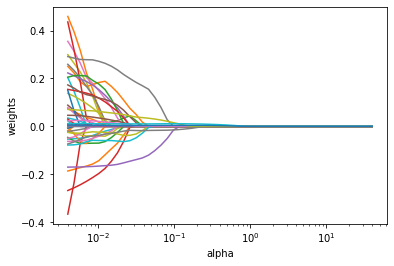

In [50]:
lasso = Lasso()
lambdalar = 10**np.linspace(2,-2,50)*0.2 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [52]:
lasso_model.predict(X_test)

array([ 0.47488786,  0.3371868 ,  0.14522998,  0.22983244,  0.07921738,
        0.26266023,  0.58453314,  0.33721193,  0.17707234,  0.2039898 ,
        0.30394305,  0.36428628,  0.51417236, -0.00143314,  0.20140884,
        0.28031454,  0.36049429,  0.41749232,  0.42311579,  0.45793178,
        0.35046411,  0.38866856,  0.38822014,  0.5373725 ,  0.05519086,
        0.37635978,  0.30856018,  0.21605654,  0.23573998,  0.47312098,
        0.16961592,  0.40321685,  0.33134339,  0.41020755,  0.47902978,
        0.31584808,  0.39040265,  0.45662269,  0.25562085,  0.44313118,
        0.19449734,  0.39668488,  0.41636735,  0.32453763,  0.15264124,
        0.32941965,  0.50614924,  0.47102445,  0.41474154,  0.28490617,
        0.4588201 ,  0.12466022,  0.23425858,  0.59479234,  0.38671011,
        0.41266354,  0.3950536 ,  0.37174428,  0.39511658,  0.3558335 ,
        0.54155635,  0.48431542,  0.31400366,  0.31845507,  0.41158806,
        0.45334749,  0.17462756,  0.33729708,  0.27121775,  0.17

In [53]:
y_pred = lasso_model.predict(X_test)
y_pred[y_pred<=0.5] = 0
y_pred[y_pred>0.5] = 1
print("acc:",accuracy_score(y_test, y_pred))
print("mse:",np.sqrt(mean_squared_error(y_test, y_pred)))

acc: 0.7340425531914894
mse: 0.5157106231293968


In [54]:
external_x_test = pd.read_csv('X_test_ex.csv', index_col=0)

external_y_testhr = pd.read_csv('y_test_ex.csv', index_col=0)
external_y_test = external_y_testhr['Termd'].squeeze()

In [55]:
external_y_pred = lasso_model.predict(external_x_test)
external_y_pred[external_y_pred<=0.5] = 0
external_y_pred[external_y_pred>0.5] = 1
print("acc:",accuracy_score(external_y_test, external_y_pred))
print("mse:",np.sqrt(mean_squared_error(external_y_test, external_y_pred)))

acc: 0.6
mse: 0.6324555320336759


# Gradient Boosting

In [56]:
X_train=X_train[["MaritalDesc_Single","RecruitmentSource_Google Search","Salary","SpecialProjectsCount","DaysLateLast30","Absences","Age"]]
X_train

,MaritalDesc_Single,RecruitmentSource_Google Search,Salary,SpecialProjectsCount,DaysLateLast30,Absences,Age
289,0.0,0.0,58523,0,0,15,33
72,1.0,0.0,59231,0,2,17,33
15,1.0,1.0,57834,0,0,20,39
10,0.0,0.0,54670,0,0,12,46
275,0.0,0.0,90100,6,0,14,33
...,...,...,...,...,...,...,...
188,1.0,0.0,55800,0,6,6,35
71,1.0,0.0,51259,0,0,1,38
106,1.0,0.0,57815,0,0,3,40
270,0.0,0.0,60120,0,0,18,31


In [57]:
X_test=X_test[["MaritalDesc_Single","RecruitmentSource_Google Search","Salary","SpecialProjectsCount","DaysLateLast30","Absences","Age"]]
X_test

,MaritalDesc_Single,RecruitmentSource_Google Search,Salary,SpecialProjectsCount,DaysLateLast30,Absences,Age
290,0.0,0.0,88976,0,0,19,52
9,0.0,0.0,50178,6,0,16,32
57,0.0,0.0,83552,6,0,2,34
60,1.0,0.0,65729,0,0,8,30
25,1.0,0.0,103613,7,0,2,56
...,...,...,...,...,...,...,...
250,0.0,0.0,56147,0,0,2,32
19,1.0,0.0,53250,0,0,13,41
146,0.0,0.0,61154,0,0,4,34
79,0.0,1.0,62514,0,0,6,47


In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [59]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [60]:
y_test.value_counts()

0    66
1    28
Name: Termd, dtype: int64

In [61]:
y_pred = gbm_model.predict(X_test)
y_pred[y_pred<=0.5] = 0
y_pred[y_pred>0.5] = 1
print("acc:",accuracy_score(y_test, y_pred))
print("mse:",np.sqrt(mean_squared_error(y_test, y_pred)))

acc: 0.6702127659574468
mse: 0.5742710457985438


# Model Tunning

In [62]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [63]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 16.7min finished


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [64]:
 gbm_cv_model.best_params_

{'learning_rate': 0.001,
 'max_depth': 5,
 'n_estimators': 1000,
 'subsample': 0.5}

In [65]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [66]:
y_pred = gbm_tuned.predict(X_test)
y_pred[y_pred<=0.5] = 0
y_pred[y_pred>0.5] = 1
print("acc:",accuracy_score(y_test, y_pred))
print("mse:",np.sqrt(mean_squared_error(y_test, y_pred)))

acc: 0.6063829787234043
mse: 0.6273890509696481


In [67]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

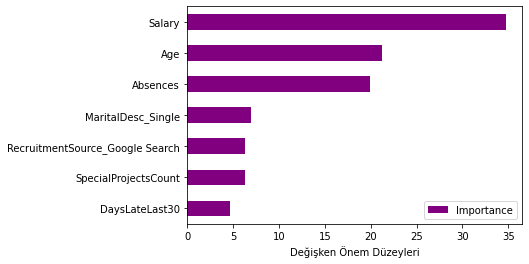

In [68]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "purple")
plt.xlabel("Değişken Önem Düzeyleri")
plt.rcParams['figure.facecolor']='white'
plt.savefig('filename.png',dpi=100, facecolor='white', transparent=False)

In [69]:
external_x_test = pd.read_csv('X_test_ex.csv', index_col=0)

external_y_testhr = pd.read_csv('y_test_ex.csv', index_col=0)
external_y_test = external_y_testhr['Termd'].squeeze()

In [70]:
external_x_test=external_x_test[["MaritalDesc_Single","RecruitmentSource_Google Search","Salary","SpecialProjectsCount","DaysLateLast30","Absences","Age"]]
external_x_test

,MaritalDesc_Single,RecruitmentSource_Google Search,Salary,SpecialProjectsCount,DaysLateLast30,Absences,Age
290,1.0,1.0,70976,1,0,9,38
9,0.0,0.0,52148,5,0,12,29
57,0.0,0.0,103122,6,0,1,34
60,0.0,0.0,732219,0,0,6,31
25,1.0,0.0,123400,8,0,2,46
63,0.0,0.0,32294,0,0,5,41
92,0.0,1.0,61321,0,0,19,37
184,0.0,0.0,53241,0,0,11,43
244,0.0,0.0,218999,7,0,5,54
46,1.0,0.0,44286,0,0,2,28


In [71]:
external_y_pred = gbm_tuned.predict(external_x_test)
external_y_pred[external_y_pred<=0.5] = 0
external_y_pred[external_y_pred>0.5] = 1
print("acc:",accuracy_score(external_y_test, external_y_pred))
print("mse:",np.sqrt(mean_squared_error(external_y_test, external_y_pred)))

acc: 0.6
mse: 0.6324555320336759


## KNN

In [72]:
from sklearn.model_selection import  cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [74]:
knn_model

KNeighborsClassifier()

In [75]:
knn_model.n_neighbors

5

In [76]:
knn_model.effective_metric_

'euclidean'

## Model Tuning

In [77]:
knn_params = {'n_neighbors': np.arange(5,20,5)}

In [78]:
knn = KNeighborsClassifier()

In [79]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 20)

In [80]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5, 10, 15])})

In [81]:
knn_cv_model.best_params_["n_neighbors"]

10

In [82]:
knn_tuned = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [83]:
knn_tuned.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [84]:
print("acc:",accuracy_score(y_test, knn_tuned.predict(X_test)))
print("mse:",np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test))))

acc: 0.648936170212766
mse: 0.5925063964103966


In [85]:
external_x_test = pd.read_csv('X_test_ex.csv', index_col=0)

external_y_testhr = pd.read_csv('y_test_ex.csv', index_col=0)
external_y_test = external_y_testhr['Termd'].squeeze()

In [86]:
external_x_test=external_x_test[["MaritalDesc_Single","RecruitmentSource_Google Search","Salary","SpecialProjectsCount","DaysLateLast30","Absences","Age"]]
external_x_test

,MaritalDesc_Single,RecruitmentSource_Google Search,Salary,SpecialProjectsCount,DaysLateLast30,Absences,Age
290,1.0,1.0,70976,1,0,9,38
9,0.0,0.0,52148,5,0,12,29
57,0.0,0.0,103122,6,0,1,34
60,0.0,0.0,732219,0,0,6,31
25,1.0,0.0,123400,8,0,2,46
63,0.0,0.0,32294,0,0,5,41
92,0.0,1.0,61321,0,0,19,37
184,0.0,0.0,53241,0,0,11,43
244,0.0,0.0,218999,7,0,5,54
46,1.0,0.0,44286,0,0,2,28


In [87]:
external_y_pred = knn_tuned.predict(external_x_test)
print("acc:",accuracy_score(external_y_test, external_y_pred))
print("mse:",np.sqrt(mean_squared_error(external_y_test, external_y_pred)))

acc: 0.7
mse: 0.5477225575051661


## Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import model_selection

In [89]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [90]:
from sklearn import metrics
y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test,y_pred)
print("acc:",accuracy_score(y_test, y_pred))
print("mse:",np.sqrt(mean_squared_error(y_test, y_pred)))

acc: 0.5957446808510638
mse: 0.6358107573397419


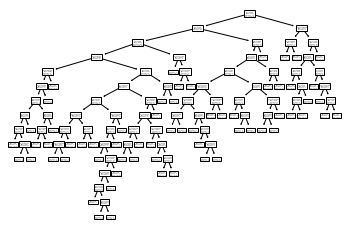

In [91]:
import matplotlib.pyplot as plt
decision_tree=tree.plot_tree(classifier)

In [92]:
external_x_test = pd.read_csv('X_test_ex.csv', index_col=0)

external_y_testhr = pd.read_csv('y_test_ex.csv', index_col=0)
external_y_test = external_y_testhr['Termd'].squeeze()

In [93]:
external_x_test=external_x_test[["MaritalDesc_Single","RecruitmentSource_Google Search","Salary","SpecialProjectsCount","DaysLateLast30","Absences","Age"]]
external_x_test

,MaritalDesc_Single,RecruitmentSource_Google Search,Salary,SpecialProjectsCount,DaysLateLast30,Absences,Age
290,1.0,1.0,70976,1,0,9,38
9,0.0,0.0,52148,5,0,12,29
57,0.0,0.0,103122,6,0,1,34
60,0.0,0.0,732219,0,0,6,31
25,1.0,0.0,123400,8,0,2,46
63,0.0,0.0,32294,0,0,5,41
92,0.0,1.0,61321,0,0,19,37
184,0.0,0.0,53241,0,0,11,43
244,0.0,0.0,218999,7,0,5,54
46,1.0,0.0,44286,0,0,2,28


In [94]:
external_y_pred = classifier.predict(external_x_test)
print("acc:",accuracy_score(external_y_test, external_y_pred))
print("mse:",np.sqrt(mean_squared_error(external_y_test, external_y_pred)))

acc: 0.4
mse: 0.7745966692414834
